# Remote Sensing - Exploring Black Marble Imagery at Penn State

## Environment Setup

### Import Packages

In [1]:
# Import packages
import os
import re # in radiance.py
from collections import ChainMap # in radiance.py
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np # in radiance.py
import pandas as pd # in radiance.py
from pandas.io.json import json_normalize # in radiance.py
import rasterio as rio # in radiance.py
from rasterio.plot import plotting_extent
from rasterio.transform import from_origin
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.mask as em # in radiance.py
import radiance as rd

### Set Package Options

In [2]:
# Set options
sns.set(font_scale=1.5)
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Define Functions

Defined in `radiance.py`

### Set Working Directory

In [8]:
# Set working directory
working_directory = os.path.join(
    et.io.HOME, "PSU", "08-covid19-remote-sensing-fusion",
    "00-git-repos", "remote-sensing-fusion")

## Data Preparation

### Define File Paths

In [9]:
# Set path to radiance files
radiance_directory = os.path.join(
    working_directory, "02-raw-data", "PSU_BlackMarble_FallSemester2018_Onwards")

psu_lat_lon_path = os.path.join(
    radiance_directory, "PSU_Pixel_LatLongs.csv")

psu_radiance_path = os.path.join(
    radiance_directory, "PSU_Radiance_RavelOrderF_3.csv")

psu_cloud_mask_path = os.path.join(
    radiance_directory, "PSU_CloudMask_RavelOrderF_3.csv")

In [10]:
# Check that all paths to files exist
for path in [psu_lat_lon_path, psu_radiance_path, psu_cloud_mask_path]:
    print(f"Path exists: {path}") if os.path.exists(
        path) else print(f"Path does not exist: {path}")

Path exists: C:\PSU\08-covid19-remote-sensing-fusion\00-git-repos\remote-sensing-fusion\02-raw-data\PSU_BlackMarble_FallSemester2018_Onwards\PSU_Pixel_LatLongs.csv
Path exists: C:\PSU\08-covid19-remote-sensing-fusion\00-git-repos\remote-sensing-fusion\02-raw-data\PSU_BlackMarble_FallSemester2018_Onwards\PSU_Radiance_RavelOrderF_3.csv
Path exists: C:\PSU\08-covid19-remote-sensing-fusion\00-git-repos\remote-sensing-fusion\02-raw-data\PSU_BlackMarble_FallSemester2018_Onwards\PSU_CloudMask_RavelOrderF_3.csv


### Read CSV Files to Geodataframes

In [11]:
# Read lat/lon into dataframe
psu_lat_lon_df = pd.read_csv(psu_lat_lon_path)

In [12]:
# Display dataframe
psu_lat_lon_df.head()

,ID,Latitude,Longitude
0,0,40.829917,-77.937355
1,1,40.825751,-77.937355
2,2,40.821584,-77.937355
3,3,40.817417,-77.937355
4,4,40.813251,-77.937355


In [13]:
# Read radiance values to dataframe
psu_radiance_df = pd.read_csv(psu_radiance_path)

In [14]:
psu_radiance_df.head()

,2018-09-01,2018-09-02,2018-09-03,2018-09-04,2018-09-05,2018-09-06,2018-09-07,2018-09-08,2018-09-09,2018-09-10,2018-09-11,2018-09-12,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-22,2018-09-23,2018-09-24,2018-09-25,2018-09-26,2018-09-27,2018-09-28,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08,2018-10-09,2018-10-10,2018-10-11,2018-10-12,2018-10-13,2018-10-14,2018-10-15,2018-10-16,2018-10-17,2018-10-18,2018-10-19,2018-10-20,2018-10-21,2018-10-22,2018-10-23,2018-10-24,2018-10-25,2018-10-26,2018-10-27,2018-10-28,2018-10-29,2018-10-30,2018-10-31,2018-11-01,2018-11-02,2018-11-03,2018-11-04,2018-11-05,2018-11-06,2018-11-07,2018-11-08,2018-11-09,2018-11-10,2018-11-11,2018-11-12,2018-11-13,2018-11-14,2018-11-15,2018-11-16,2018-11-17,2018-11-18,2018-11-19,2018-11-20,2018-11-21,2018-11-22,2018-11-23,2018-11-24,2018-11-25,2018-11-26,2018-11-27,2018-11-28,2018-11-29,2018-11-30,2018-12-01,2018-12-02,2018-12-03,2018-12-04,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14,2018-12-15,2018-12-16,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-16,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06,2019-04-07,2019-04-08,2019-04-09,2019-04-10,2019-04-11,2019-04-12,2019-04-13,2019-04-14,2019-04-15,2019-04-16,2019-04-17,2019-04-18,2019-04-19,2019-04-20,2019-04-21,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-04,2019-05-05,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-11,2019-05-12,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-18,2019-05-19,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05,2019-06-06,2019-06-07,2019-06-08,2019-06-09,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-20,2019-06-21,2019-06-22,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-03,2019-07-04,2019-07-06,2019-07-07,2019-07-08,2019-07-11,2019-07-12,2019-07-14,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19,2019-07-20,2019-07-21,2019-07-22,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-27,2019-07-28,2019-07-29,2019-07-31,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-14,2019-08-15,2019-08-16,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-28,2019-08-29,2019-08-30,2019-08-31,2019-09-01,2019-09-02,2019-09-03,2019-09-04,2019-09-05,2019-09-06,2019-09-07,2019-09-08,2019-09-11,2019-09-12,2019-09-13,2019-09-14,2019-09-15,2019-09-17,2019-09-18,2019-0

In [15]:
# Read cloud mask values to dataframe
psu_cloud_mask_df = pd.read_csv(psu_cloud_mask_path)

In [16]:
psu_cloud_mask_df.head()

,2018-09-01,2018-09-02,2018-09-03,2018-09-04,2018-09-05,2018-09-06,2018-09-07,2018-09-08,2018-09-09,2018-09-10,2018-09-11,2018-09-12,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-22,2018-09-23,2018-09-24,2018-09-25,2018-09-26,2018-09-27,2018-09-28,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08,2018-10-09,2018-10-10,2018-10-11,2018-10-12,2018-10-13,2018-10-14,2018-10-15,2018-10-16,2018-10-17,2018-10-18,2018-10-19,2018-10-20,2018-10-21,2018-10-22,2018-10-23,2018-10-24,2018-10-25,2018-10-26,2018-10-27,2018-10-28,2018-10-29,2018-10-30,2018-10-31,2018-11-01,2018-11-02,2018-11-03,2018-11-04,2018-11-05,2018-11-06,2018-11-07,2018-11-08,2018-11-09,2018-11-10,2018-11-11,2018-11-12,2018-11-13,2018-11-14,2018-11-15,2018-11-16,2018-11-17,2018-11-18,2018-11-19,2018-11-20,2018-11-21,2018-11-22,2018-11-23,2018-11-24,2018-11-25,2018-11-26,2018-11-27,2018-11-28,2018-11-29,2018-11-30,2018-12-01,2018-12-02,2018-12-03,2018-12-04,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14,2018-12-15,2018-12-16,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-16,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06,2019-04-07,2019-04-08,2019-04-09,2019-04-10,2019-04-11,2019-04-12,2019-04-13,2019-04-14,2019-04-15,2019-04-16,2019-04-17,2019-04-18,2019-04-19,2019-04-20,2019-04-21,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-04,2019-05-05,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-11,2019-05-12,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-18,2019-05-19,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05,2019-06-06,2019-06-07,2019-06-08,2019-06-09,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-20,2019-06-21,2019-06-22,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-03,2019-07-04,2019-07-06,2019-07-07,2019-07-08,2019-07-11,2019-07-12,2019-07-14,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19,2019-07-20,2019-07-21,2019-07-22,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-27,2019-07-28,2019-07-29,2019-07-31,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-14,2019-08-15,2019-08-16,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-28,2019-08-29,2019-08-30,2019-08-31,2019-09-01,2019-09-02,2019-09-03,2019-09-04,2019-09-05,2019-09-06,2019-09-07,2019-09-08,2019-09-11,2019-09-12,2019-09-13,2019-09-14,2019-09-15,2019-09-17,2019-09-18,2019-0

### Add Missings Dates and Data

In [17]:
# Fill radiance data with missing dates (dates specified by user)
psu_radiance_filled = rd.add_missing_data(
    psu_radiance_df, '2018-09-01', '2020-05-07')

In [18]:
# Display dataset with filled data (NaN)
psu_radiance_filled.head()

,2018-09-01,2018-09-02,2018-09-03,2018-09-04,2018-09-05,2018-09-06,2018-09-07,2018-09-08,2018-09-09,2018-09-10,2018-09-11,2018-09-12,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-22,2018-09-23,2018-09-24,2018-09-25,2018-09-26,2018-09-27,2018-09-28,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08,2018-10-09,2018-10-10,2018-10-11,2018-10-12,2018-10-13,2018-10-14,2018-10-15,2018-10-16,2018-10-17,2018-10-18,2018-10-19,2018-10-20,2018-10-21,2018-10-22,2018-10-23,2018-10-24,2018-10-25,2018-10-26,2018-10-27,2018-10-28,2018-10-29,2018-10-30,2018-10-31,2018-11-01,2018-11-02,2018-11-03,2018-11-04,2018-11-05,2018-11-06,2018-11-07,2018-11-08,2018-11-09,2018-11-10,2018-11-11,2018-11-12,2018-11-13,2018-11-14,2018-11-15,2018-11-16,2018-11-17,2018-11-18,2018-11-19,2018-11-20,2018-11-21,2018-11-22,2018-11-23,2018-11-24,2018-11-25,2018-11-26,2018-11-27,2018-11-28,2018-11-29,2018-11-30,2018-12-01,2018-12-02,2018-12-03,2018-12-04,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14,2018-12-15,2018-12-16,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-16,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06,2019-04-07,2019-04-08,2019-04-09,2019-04-10,2019-04-11,2019-04-12,2019-04-13,2019-04-14,2019-04-15,2019-04-16,2019-04-17,2019-04-18,2019-04-19,2019-04-20,2019-04-21,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-04,2019-05-05,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-11,2019-05-12,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-18,2019-05-19,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05,2019-06-06,2019-06-07,2019-06-08,2019-06-09,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,2019-06-18,2019-06-19,2019-06-20,2019-06-21,2019-06-22,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-02,2019-07-03,2019-07-04,2019-07-05,2019-07-06,2019-07-07,2019-07-08,2019-07-09,2019-07-10,2019-07-11,2019-07-12,2019-07-13,2019-07-14,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19,2019-07-20,2019-07-21,2019-07-22,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-27,2019-07-28,2019-07-29,2019-07-30,2019-07-31,2019-08-01,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-13,2019-08-14,2019-08-15,2019-08-16,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-0

In [19]:
# Fill cloud mask data with missing dates
psu_cloud_mask_filled = rd.add_missing_data(
    psu_cloud_mask_df, '2018-09-01', '2020-05-07')

In [20]:
# Display filled dataset with filled data (NaN)
psu_cloud_mask_filled.head()

,2018-09-01,2018-09-02,2018-09-03,2018-09-04,2018-09-05,2018-09-06,2018-09-07,2018-09-08,2018-09-09,2018-09-10,2018-09-11,2018-09-12,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-22,2018-09-23,2018-09-24,2018-09-25,2018-09-26,2018-09-27,2018-09-28,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08,2018-10-09,2018-10-10,2018-10-11,2018-10-12,2018-10-13,2018-10-14,2018-10-15,2018-10-16,2018-10-17,2018-10-18,2018-10-19,2018-10-20,2018-10-21,2018-10-22,2018-10-23,2018-10-24,2018-10-25,2018-10-26,2018-10-27,2018-10-28,2018-10-29,2018-10-30,2018-10-31,2018-11-01,2018-11-02,2018-11-03,2018-11-04,2018-11-05,2018-11-06,2018-11-07,2018-11-08,2018-11-09,2018-11-10,2018-11-11,2018-11-12,2018-11-13,2018-11-14,2018-11-15,2018-11-16,2018-11-17,2018-11-18,2018-11-19,2018-11-20,2018-11-21,2018-11-22,2018-11-23,2018-11-24,2018-11-25,2018-11-26,2018-11-27,2018-11-28,2018-11-29,2018-11-30,2018-12-01,2018-12-02,2018-12-03,2018-12-04,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14,2018-12-15,2018-12-16,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-16,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06,2019-04-07,2019-04-08,2019-04-09,2019-04-10,2019-04-11,2019-04-12,2019-04-13,2019-04-14,2019-04-15,2019-04-16,2019-04-17,2019-04-18,2019-04-19,2019-04-20,2019-04-21,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-04,2019-05-05,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-11,2019-05-12,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-18,2019-05-19,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05,2019-06-06,2019-06-07,2019-06-08,2019-06-09,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,2019-06-18,2019-06-19,2019-06-20,2019-06-21,2019-06-22,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-02,2019-07-03,2019-07-04,2019-07-05,2019-07-06,2019-07-07,2019-07-08,2019-07-09,2019-07-10,2019-07-11,2019-07-12,2019-07-13,2019-07-14,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19,2019-07-20,2019-07-21,2019-07-22,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-27,2019-07-28,2019-07-29,2019-07-30,2019-07-31,2019-08-01,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-13,2019-08-14,2019-08-15,2019-08-16,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-0

### Extract Plotting Extent & Transform

In [21]:
# Extract PSU extent and transform from lat/lon dataframe
psu_extent, psu_transform, psu_shape = rd.extract_extent(
    study_area=psu_lat_lon_df, 
    longitude_column='Longitude', 
    latitude_column='Latitude')

In [22]:
# Display extent (left, right, bottom, top)
psu_extent

(-77.93735504, -77.77068837333334, 40.754917322941175, 40.82991733)

In [23]:
# Display tranform (used for export)
psu_transform

Affine(0.004166666666666521, 0.0, -77.93735504,
       0.0, -0.004166667058823534, 40.82991733)

In [24]:
# Display shape
psu_shape

(18, 40)

### Create GeoDataFrame of Lat/Lon Points

In [25]:
# Create geodataframe to store lat/lon points 
#  (for plotting over array)
psu_lat_lon_copy = psu_lat_lon_df.copy()

psu_lat_lon_gdf = gpd.GeoDataFrame(
    psu_lat_lon_copy, 
    crs="epsg:4326", 
    geometry=gpd.points_from_xy(
        psu_lat_lon_copy.Longitude, 
        psu_lat_lon_copy.Latitude)
)

In [26]:
# Display dataframe
psu_lat_lon_gdf.head()

,ID,Latitude,Longitude,geometry
0,0,40.829917,-77.937355,POINT (-77.93736 40.82992)
1,1,40.825751,-77.937355,POINT (-77.93736 40.82575)
2,2,40.821584,-77.937355,POINT (-77.93736 40.82158)
3,3,40.817417,-77.937355,POINT (-77.93736 40.81742)
4,4,40.813251,-77.937355,POINT (-77.93736 40.81325)


## Data Processing

### Store Daily Radiance Values

In [27]:
# Get list of dates (daily) from Sept 1, 2018 to May 7, 2020
date_list = rd.create_date_list(start_date='2018-09-01', end_date='2020-05-07')

In [28]:
# Display number of days in list
len(date_list)

615

In [29]:
# Store all daily filled values in nested dictionary
#  (indexed by [Year][Month][Day])
radiance_sept_2018_may_2020 = rd.store_data(
    psu_radiance_filled, psu_cloud_mask_filled, 
    mask_value=100, array_shape=psu_shape, dates=date_list)

In [30]:
# Initialize counters for years/months/days in dictionary
years = months = days = 0
radiance_dict = radiance_sept_2018_may_2020

# Loop through all years
for key_year in radiance_dict.keys():

    # Add to counter for each year
    years += 1
    
    # Loop through all months
    for key_month in radiance_dict.get(key_year).keys():
        
        # Add to counter for each month
        months += 1
        
        # Loop through all days
        for key_day in radiance_dict.get(key_year).get(key_month):
        
            # Add to counter for each day
            days += 1

In [31]:
# Display number of years/months/days in dictionary
print(f"Entries in Radiance Dictionary\nYears:    {years}\nMonths:  {months}\nDays:   {days}")

Entries in Radiance Dictionary
Years:    3
Months:  21
Days:   615


### Calculate and Store Radiance Means

**PSU Academic Calendars**

http://www.registrar.psu.edu/academic-calendars/

http://www.registrar.psu.edu/academic-calendars/2018-19.cfm

http://www.registrar.psu.edu/academic-calendars/2019-20.cfm

### Date Range Radiance Mean - Monthly Radiance

In [32]:
# Define year/month tuples to loop through
calendar_months_2018_2020 = [
    '2018-09',
    '2018-10',
    '2018-11',
    '2018-12',
    '2019-01',
    '2019-02',
    '2019-03',
    '2019-04',
    '2019-05',
    '2019-06',
    '2019-07',
    '2019-08',
    '2019-09',
    '2019-10',
    '2019-11',
    '2019-12',
    '2020-01',
    '2020-02',
    '2020-03',
    '2020-04'
]

In [33]:
# Store monthly means in dictionary
radiance_monthtly_mean = rd.store_monthly_mean(
    radiance_daily=radiance_sept_2018_may_2020, 
    dates=calendar_months_2018_2020)

In [34]:
# Show top-level keys (years)
radiance_monthtly_mean.keys()

dict_keys(['2018', '2019', '2020'])

In [35]:
# Show 2018 keys (months)
radiance_monthtly_mean.get('2018').keys()

dict_keys(['09', '10', '11', '12'])

In [36]:
# Show 2019 keys (months)
radiance_monthtly_mean.get('2019').keys()

dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

In [37]:
# Show 2020 keys (months)
radiance_monthtly_mean.get('2020').keys()

dict_keys(['01', '02', '03', '04'])

In [38]:
# Get min and max values for September 2019 mean
print(f"Min Radiance, Sept 2019 Mean Values: {radiance_monthtly_mean.get('2019').get('09').min()}")
print(f"Max Radiance, Sept 2019 Mean Values: {radiance_monthtly_mean.get('2019').get('09').max()}")

Min Radiance, Sept 2019 Mean Values: 21.565217391304348
Max Radiance, Sept 2019 Mean Values: 611.1739130434783


In [39]:
# Get min and max values for March 2020 mean
print(f"Min Radiance, March 2020 Mean Values: {radiance_monthtly_mean.get('2020').get('03').min()}")
print(f"Max Radiance, March 2020 Mean Values: {radiance_monthtly_mean.get('2020').get('03').max()}")

Min Radiance, March 2020 Mean Values: 21.741935483870968
Max Radiance, March 2020 Mean Values: 430.03225806451616


In [40]:
# # Calculate Sept 2019 to March 2020 difference
# diff_sept_2019_march_2020 = rd.subtract_arrays(
#     radiance_monthtly_mean.get('2020').get('03'),
#     radiance_monthtly_mean.get('2019').get('09'))

# # Plot difference from Sept 2019 to March 2020
# ep.plot_bands(
#     diff_sept_2019_march_2020, 
#     scale=False, 
#     vmin=diff_sept_2019_march_2020.min(),
#     vmax=-diff_sept_2019_march_2020.min(),
#     cmap='RdBu_r',
#     figsize=(16, 8))

# plt.show()

### Date Range Radiance Mean - Continuous Date Ranges

In [41]:
# Define date ranges (start date, end date) to loop through
academic_years_2018_2020 = [
       
    # Labor day weekend to commencement weekend (includes day after commencement)
    ('2018-09-01', '2018-12-16'),
    
    # Thanksgiving holiday
    ('2018-11-18', '2018-11-24'),
    
    # Fall study days & final exam week
    ('2018-12-08', '2018-12-14'),
    
    # After Fall commencement to before Spring new student arrival
    ('2018-12-17', '2019-01-04'),
    
    # Spring new student arrival to Spring commencement (commencement weekend)
    ('2019-01-05', '2019-05-05'),
    
    # Spring break
    ('2019-03-03', '2019-03-09'),
    
    # Spring study days & final exam week
    ('2019-04-27', '2019-05-03'),
    
    # Maymester (excluding arrival day, which occurs on Spring commencement)
    ('2019-05-06', '2019-06-05'),
    
    # Summer session (regular) through commencement (includes day after commencement)
    ('2019-05-12', '2019-08-11'),
    
    
    # 2019-2020 academic year
    # Fall new student arrival to commencement weekend (includes day after commencement)
    ('2019-08-23', '2019-12-22'),
    
    # Labor day weekend to Commencement weekend (includes day after commencement)
    ('2019-08-31', '2019-12-22'),
        
    # Thanksgiving holiday
    ('2019-11-24', '2019-11-30'),
    
    # Fall study days & final exam week
    ('2019-12-14', '2019-12-20'),
    
    # After Fall commencement to before Spring new student arrival
    ('2019-12-23', '2020-01-10'),
    
    # Spring new student arrival to Spring commencement (commencement weekend)
    ('2020-01-11', '2020-05-10'),
    
    # Spring break
    ('2020-03-08', '2020-03-14'),
    
    # Spring study days & final exam week
    ('2020-05-02', '2020-05-08')
    
#     # Maymester (excluding arrival day, which occurs on Spring commencement)
#     rd.create_date_list('2020-05-11', '2020-06-10'),
    
#     # Summer session (regular) through commencement (includes day after commencement)
#     rd.create_date_list('2020-05-18', '2020-08-15')
]

In [42]:
# Store continuous ranges means in dictionary
academic_years_2018_2020_means = rd.store_continuous_range_mean(
    radiance_daily=radiance_sept_2018_may_2020,
    date_range_list=academic_years_2018_2020)

In [43]:
# Show all keys in dictionary
for key in academic_years_2018_2020_means.keys():
    print(key)

20180901-20181216
20181118-20181124
20181208-20181214
20181217-20190104
20190105-20190505
20190303-20190309
20190427-20190503
20190506-20190605
20190512-20190811
20190823-20191222
20190831-20191222
20191124-20191130
20191214-20191220
20191223-20200110
20200111-20200510
20200308-20200314
20200502-20200508


In [44]:
# Display number of keys
len(academic_years_2018_2020_means.keys())

17

In [45]:
# Display shape of single mean array in dictionary
academic_years_2018_2020_means.get('20190512-20190811').shape

(18, 40)

### Date Range Radiance Mean - Recurring Weekly Days (SUN, MON, TUE, etc.)

In [46]:
# Define date ranges for academic semesters
semester_ranges = [
    
    # Fall 2018
    ('2018-09-01', '2018-12-16'),
    
    # Spring 2019
    ('2019-01-05', '2019-05-05'),

    # Summer 2019
    ('2019-05-12', '2019-08-11'),
    
    # Fall 2019
    ('2019-08-31', '2019-12-22'),
    
    # Spring 2020
    ('2020-01-11', '2020-05-10')
]

In [47]:
# Create list of dictionaries with stored semester weekly radiances
semesters_weekly = [rd.store_weekly_range_mean(radiance_sept_2018_may_2020, start_date, end_date)
                    for start_date, end_date in semester_ranges]

In [48]:
# Unpack list of dictionaries to single dictionary
semesters_unpacked = rd.unpack_dictionaries(semesters_weekly)

# Display all keys in unpacked dictionary
for key in semesters_unpacked.keys():
    print(key)

20180901-20181216-SUN
20180901-20181216-MON
20180901-20181216-TUE
20180901-20181216-WED
20180901-20181216-THU
20180901-20181216-FRI
20180901-20181216-SAT
20180901-20181216-BUS
20190105-20190505-SUN
20190105-20190505-MON
20190105-20190505-TUE
20190105-20190505-WED
20190105-20190505-THU
20190105-20190505-FRI
20190105-20190505-SAT
20190105-20190505-BUS
20190512-20190811-SUN
20190512-20190811-MON
20190512-20190811-TUE
20190512-20190811-WED
20190512-20190811-THU
20190512-20190811-FRI
20190512-20190811-SAT
20190512-20190811-BUS
20190831-20191222-SUN
20190831-20191222-MON
20190831-20191222-TUE
20190831-20191222-WED
20190831-20191222-THU
20190831-20191222-FRI
20190831-20191222-SAT
20190831-20191222-BUS
20200111-20200510-SUN
20200111-20200510-MON
20200111-20200510-TUE
20200111-20200510-WED
20200111-20200510-THU
20200111-20200510-FRI
20200111-20200510-SAT
20200111-20200510-BUS


In [49]:
# Display number of keys
len(semesters_unpacked.keys())

40

In [50]:
# Display shape of single mean array in dictionary
semesters_unpacked.get('20190831-20191222-MON').shape

(18, 40)

## Plot Functions

def plot_values

def plot_histogram


In [51]:
def plot_values(radiance, difference=False):
    """Plots the values in a radiance array.

    Parameters
    ----------
    radiance : numpy array
        Array containing raw values, mean values,
        or difference values.

    difference : bool, optional
        Boolean indicating if the array contains raw 
        values or mean values (False) or contains
        difference values (True). Default value is False.

    Returns
    -------
    ax : matplotlib.axes._subplots.AxesSubplot object
        The axes object associated with the plot.

    Example
    -------
        >>>
        >>>
        >>>
    """
    # Find absolute values for radiance min & max
    radiance_min_abs = np.absolute(radiance.min())
    radiance_max_abs = np.absolute(radiance.max())

    # Determine max value (for plotting vmin/vmax)
    plot_max = radiance_min_abs if (
        radiance_min_abs > radiance_max_abs) else radiance_max_abs

    # Use dark background
    with plt.style.context('dark_background'):
        # Define axes object
        ax = ep.plot_bands(
            radiance,
            scale=False,
            title="Radiance Change ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)" if difference else "Radiance Values ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
            vmin=-plot_max if difference else 0,
            vmax=plot_max,
            cmap='RdBu_r' if difference else "Greys_r",
            figsize=(16, 8))

    # Return axes object
    return ax



# # Create figure and axes object
# fig, ax = plt.subplots(figsize=(20, 10))

# # Plot radiance values
# ep.plot_bands(
#     radiance_monthtly_mean.get('2019').get('09'),
#     title="September 2019 Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
#     #cmap='Greens_r',
#     scale=False,
#     extent=psu_extent, 
#     ax=ax,
#     vmax=radiance_monthtly_mean.get('2019').get('09').max())

# # Plot lat/lon (centroids)
# # psu_lat_lon_gdf.plot(ax=ax)

# plt.show()


# # Add caption
#     fig.text(0.5, .1, "Data Source: NASA Black Marble",
#              ha='center', fontsize=16)
    
#     ax[0].title.set_size(20)
#     ax[1].title.set_size(20)
#     ax[2].title.set_size(20)

# plt.savefig(
#     fname="penn-state-mean-radiance-change-sept2019-mar2020-values.png", 
#     facecolor='k', dpi=300, transparent=True, bbox_inches='tight')

In [52]:
# Calculate September 2018 to September 2019 difference
diff_sep_2018_sep_2019 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2019').get('09'),
    radiance_monthtly_mean.get('2018').get('09'))

diff_sep_2019_march_2020 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2020').get('03'),
    radiance_monthtly_mean.get('2019').get('09'))

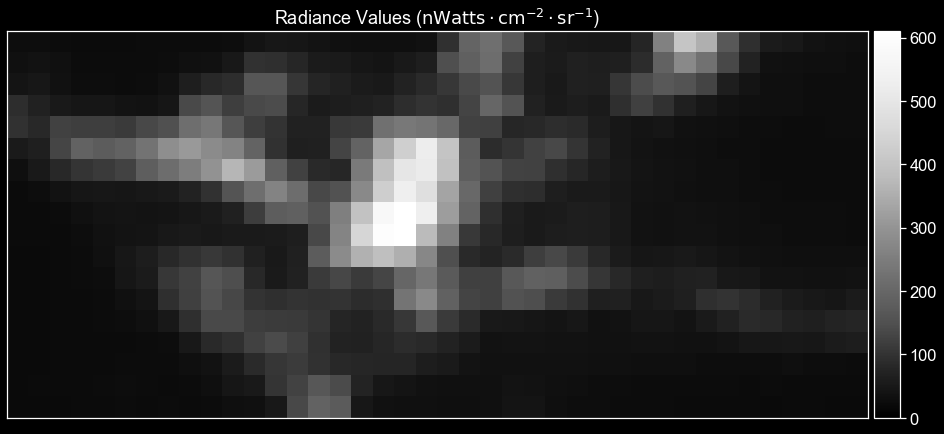

In [53]:
# Plot Sept 2019 mean
plot = plot_values(radiance_monthtly_mean.get('2019').get('09'), difference=False)

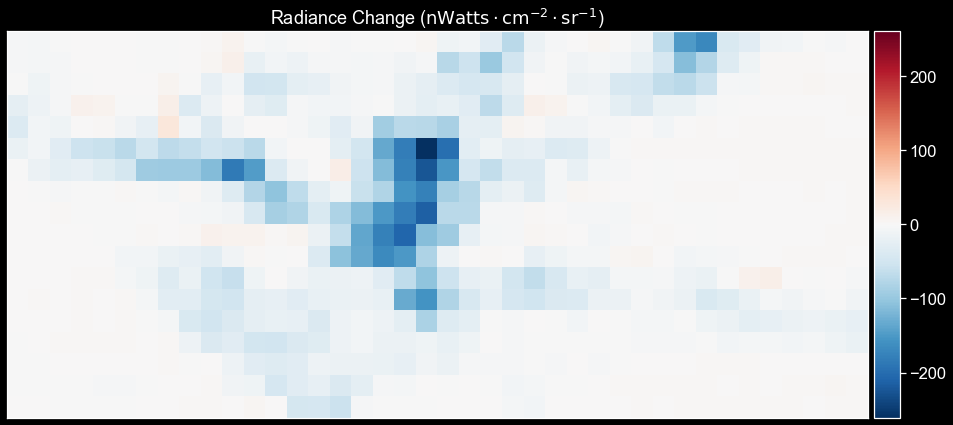

In [54]:
# Plot difference from Sept 2019 to March 2020
plot = plot_values(diff_sep_2019_march_2020, difference=True)

#### Plot Differences from Baseline

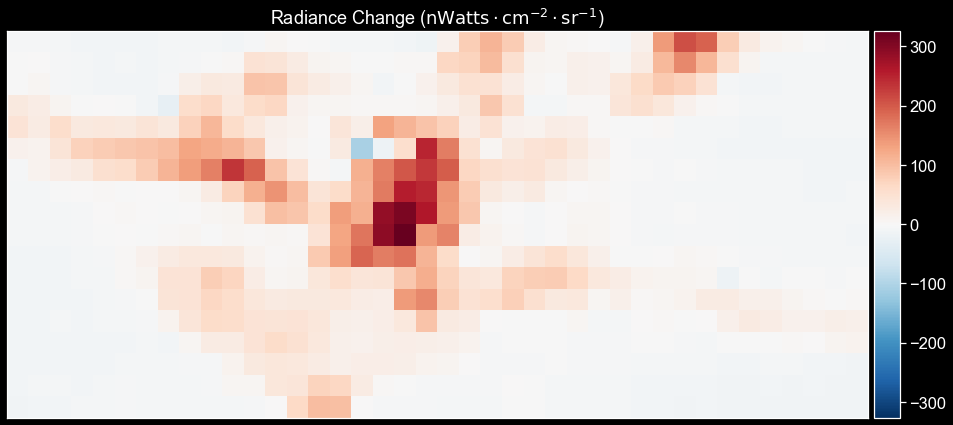

In [55]:
# Calculate September 2018 to September 2019 difference
diff_sep_2018_sep_2019 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2019').get('09'),
    radiance_monthtly_mean.get('2018').get('09'))

# Plot difference
plot = plot_values(diff_sep_2018_sep_2019, difference=True)

plt.show()

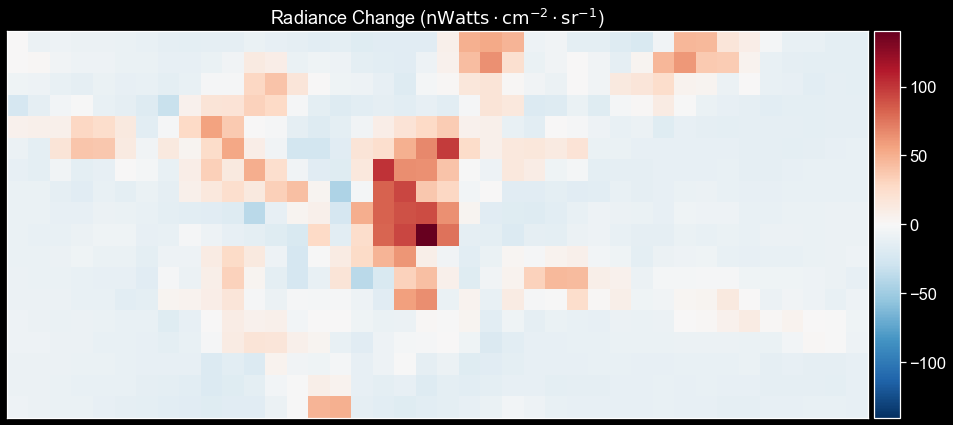

In [56]:
# Calculate October 2018 to October 2019 difference
diff_oct_2018_oct_2019 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2019').get('10'),
    radiance_monthtly_mean.get('2018').get('10'))

# Plot difference
plot = plot_values(diff_oct_2018_oct_2019, difference=True)

plt.show()

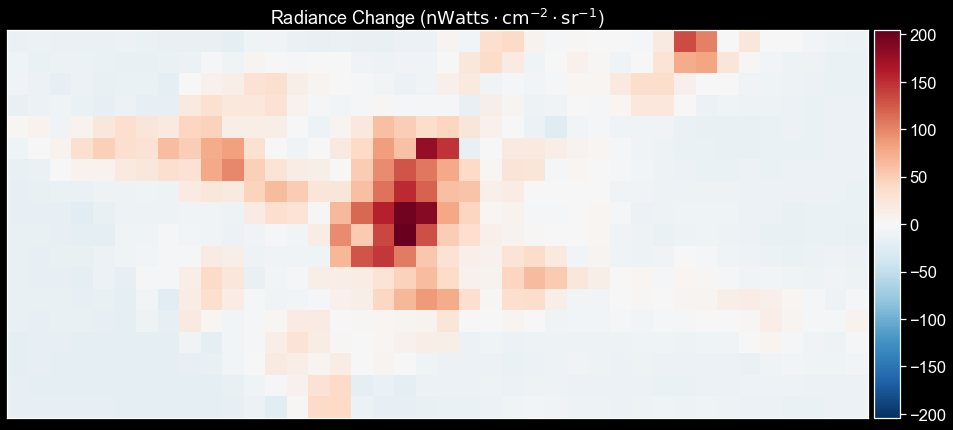

In [57]:
# Calculate November 2018 to November 2019 difference
diff_nov_2018_nov_2019 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2019').get('11'),
    radiance_monthtly_mean.get('2018').get('11'))

# Plot difference
plot = plot_values(diff_nov_2018_nov_2019, difference=True)

plt.show()

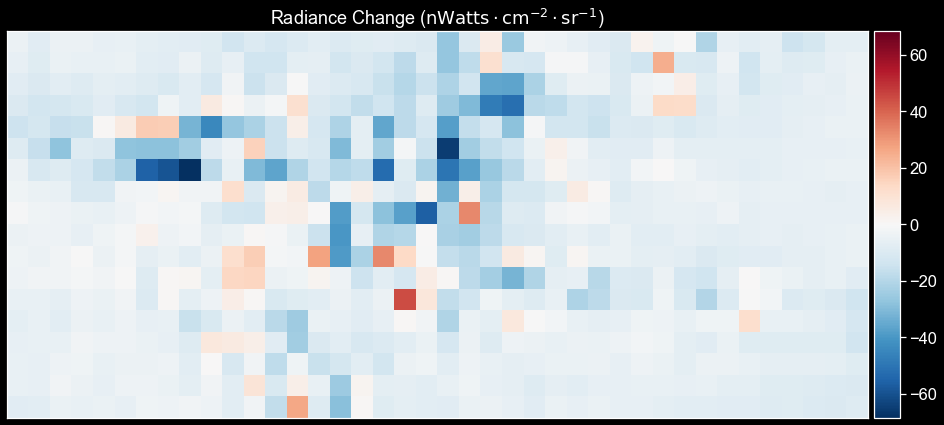

In [58]:
# Calculate December 2018 to December 2019 difference
diff_dec_2018_dec_2019 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2019').get('12'),
    radiance_monthtly_mean.get('2018').get('12'))

# Plot difference
plot = plot_values(diff_dec_2018_dec_2019, difference=True)

plt.show()

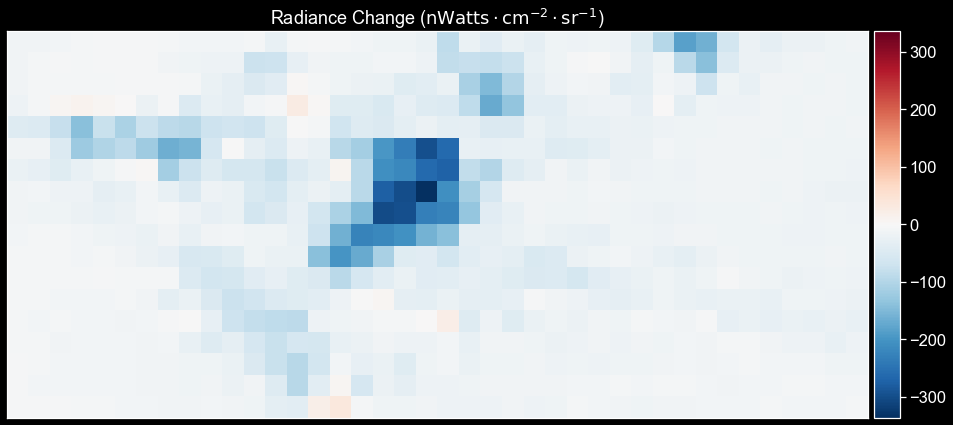

In [60]:
# Calculate January 2019 to January 2020 difference
diff_jan_2019_jan_2020 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2020').get('01'),
    radiance_monthtly_mean.get('2019').get('01'))

# Plot difference
plot = plot_values(diff_jan_2019_jan_2020, difference=True)

plt.show()

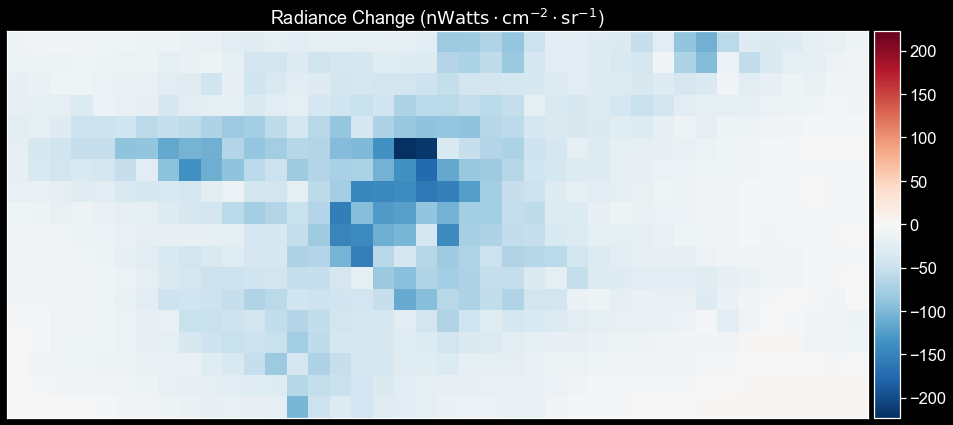

In [61]:
# Calculate February 2019 to February 2020 difference
diff_feb_2019_feb_2020 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2020').get('02'),
    radiance_monthtly_mean.get('2019').get('02'))

# Plot difference
plot = plot_values(diff_feb_2019_feb_2020, difference=True)

plt.show()

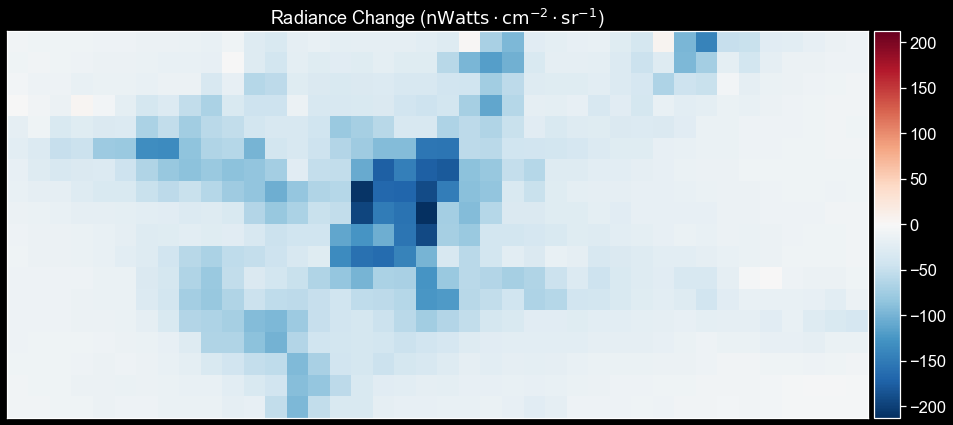

In [62]:
# Calculate March 2019 to March 2020 difference
diff_march_2019_march_2020 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2020').get('03'),
    radiance_monthtly_mean.get('2019').get('03'))

# Plot difference
plot = plot_values(diff_march_2019_march_2020, difference=True)

plt.show()

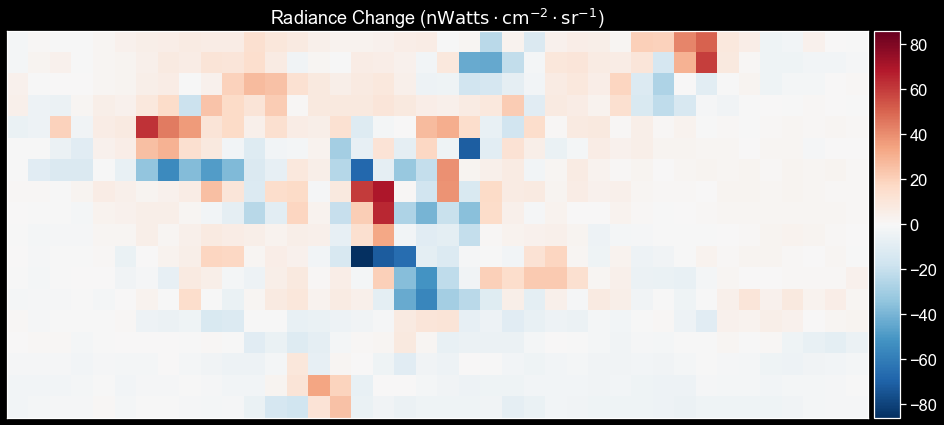

In [63]:
# Calculate April 2019 to April 2020 difference
diff_april_2019_april_2020 = rd.subtract_arrays(
    radiance_monthtly_mean.get('2020').get('04'),
    radiance_monthtly_mean.get('2019').get('04'))

# Plot difference
plot = plot_values(diff_april_2019_april_2020, difference=True)

plt.show()

#### Plot Non-Continuous Date Ranges - Weekly Individual Days

In [64]:
# Get Spring 2019 Sunday and Spring 2020 Sunday mean
spring_2019_sunday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20190105-20190505-SUN')
spring_2020_sunday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20200111-20200510-SUN')

diff = rd.subtract_arrays(spring_2020_sunday_mean, spring_2019_sunday_mean)

plot = plot_values(diff, difference=True)

plt.show()

NameError: name 'radiance_weekly_fall_2018_spring_2020' is not defined

In [ ]:
# Get Spring 2019 Mondays and Spring 2020 Mondays mean
spring_2019_monday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20190105-20190505-MON')
spring_2020_monday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20200111-20200510-MON')

diff = spring_2020_monday_mean - spring_2019_monday_mean

# Plot radiance values
ep.plot_bands(
    diff,
    title="Mean Radiance Difference ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    cmap='RdBu_r',
    figsize=(20, 10),
    scale=False,
    vmin=diff.min(),
    vmax=-diff.min()
)


In [ ]:
# Get Spring 2019 Tue and Spring 2020 Tue mean
spring_2019_tuesday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20190105-20190505-TUE')
spring_2020_tuesday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20200111-20200510-TUE')

diff = spring_2020_tuesday_mean - spring_2019_tuesday_mean

# Plot radiance values
ep.plot_bands(
    diff,
    title="Mean Radiance Difference ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    cmap='RdBu_r',
    figsize=(20, 10),
    scale=False,
    vmin=diff.min(),
    vmax=-diff.min()
)


In [ ]:
# Get Spring 2019 Wedand Spring 2020 Wed mean
spring_2019_wednesday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20190105-20190505-WED')
spring_2020_wednesday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20200111-20200510-WED')

diff = spring_2020_wednesday_mean - spring_2019_wednesday_mean

# Plot radiance values
ep.plot_bands(
    diff,
    title="Mean Radiance Difference ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    cmap='RdBu_r',
    figsize=(20, 10),
    scale=False,
    vmin=diff.min(),
    vmax=-diff.min()
)


In [ ]:
# Get Spring 2019 Thurs and Spring 2020 Thurs mean
spring_2019_thursday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20190105-20190505-THU')
spring_2020_thursday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20200111-20200510-THU')

diff = spring_2020_thursday_mean - spring_2019_thursday_mean

# Plot radiance values
ep.plot_bands(
    diff,
    title="Mean Radiance Difference ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    cmap='RdBu_r',
    figsize=(20, 10),
    scale=False,
    vmin=diff.min(),
    vmax=-diff.min()
)


In [ ]:
# Get Spring 2019 Thurs and Spring 2020 Thurs mean
spring_2019_friday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20190105-20190505-FRI')
spring_2020_friday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20200111-20200510-FRI')

diff = spring_2020_friday_mean - spring_2019_friday_mean

# Plot radiance values
ep.plot_bands(
    diff,
    title="Mean Radiance Difference ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    cmap='RdBu_r',
    figsize=(20, 10),
    scale=False,
    vmin=-diff.max(),
    vmax=diff.max()
)


In [ ]:
# Get Spring 2019 Thurs and Spring 2020 Thurs mean
spring_2019_saturday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20190105-20190505-SAT')
spring_2020_saturday_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20200111-20200510-SAT')

diff = spring_2020_saturday_mean - spring_2019_saturday_mean

# Plot radiance values
ep.plot_bands(
    diff,
    title="Mean Radiance Difference ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    cmap='RdBu_r',
    figsize=(20, 10),
    scale=False,
    vmin=diff.min(),
    vmax=-diff.min()
)


#### Plot Non-Continuous Date Ranges - Weekly Business Days

In [ ]:
# Get Spring 2019 Sunday and Spring 2020 Sunday mean
spring_2019_business_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20190105-20190505-SUN')
spring_2020_business_mean = radiance_weekly_fall_2018_spring_2020.get(
    '20200111-20200510-SUN')

diff = spring_2020_business_mean - spring_2019_business_mean

# Plot radiance values
ep.plot_bands(
    diff,
    title="Mean Radiance Difference ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    cmap='RdBu_r',
    figsize=(20, 10),
    scale=False,
    vmin=-diff.max(),
    vmax=diff.max())


## Data Visualization

### Plot Single-Pixel Radiance Values

In [ ]:
# # Get radiance data for one pixel (Sept 2019 - April 2020)
# pixel_id_0_radiance = psu_radiance_filled.loc[0]

In [ ]:
# # Get cloud mask data for one pixel (Sept 2019 - April 2020)
# pixel_id_0_mask = psu_cloud_mask_filled.loc[[0]]

In [ ]:
# # Plot single-pixel time series
# with plt.style.context('dark_background'):
    
#     ax = pixel_id_0_radiance.plot(figsize=(16,6), grid=False, color='#ff7f00', linewidth=2)
    
#     ax.set_title('Penn State Campus - Single-Pixel Time Series\nPixel ID 0 - Longitude: -77.937355, Latitude: 40.829917')
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Unmasked Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)')

### Plot Cloud Free Mean Radiance Values for September 2019

In [ ]:
# Create figure and axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot radiance values
ep.plot_bands(
    radiance_monthtly_mean.get('2019').get('09'),
    title="September 2019 Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    #cmap='Greens_r',
    scale=False,
    extent=psu_extent, 
    ax=ax,
    vmax=radiance_monthtly_mean.get('2019').get('09').max())

# Plot lat/lon (centroids)
# psu_lat_lon_gdf.plot(ax=ax)

plt.show()

In [ ]:
# Histogram
with plt.style.context('dark_background'):
    fig, ax = ep.hist(
        sept_2019_radiance_mean,
        hist_range=(0, sept_2019_radiance_mean.max()),
        colors='#984ea3',
        title='Distribution of the Mean Radiance (September 2019)',
        xlabel='Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)', 
        ylabel='Pixel Count')

    plt.suptitle("Penn State Campus\nCloud Free Mean Radiance", size=24)

    # Add caption
    fig.text(0.5, .03, "Data Source: NASA Black Marble",
             ha='center', fontsize=14)

    plt.show()

### Plot Cloud Free Mean Radiance Values for March 2020

In [ ]:
# Create figure and axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot with extent
ep.plot_bands(
    radiance_monthtly_mean.get('2020').get('03'),
    title="March 2020 Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
    #cmap='Greens_r',
    scale=False,
    extent=psu_extent, 
    ax=ax, 
    vmax=radiance_monthtly_mean.get('2020').get('03').max())

plt.show()

In [ ]:
# Histogram
with plt.style.context('dark_background'):
    fig, ax = ep.hist(
        radiance_monthtly_mean.get('2020').get('03'),
        hist_range=(0, radiance_monthtly_mean.get('2019').get('09').max()),
        colors='#984ea3',
        title='Distribution of the Mean Radiance (March 2020)',
        xlabel='Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)',
        ylabel='Pixel Count')

    plt.suptitle("Penn State Campus\nCloud Free Mean Radiance", size=24)

    # Add caption
    fig.text(0.5, .03, "Data Source: NASA Black Marble",
             ha='center', fontsize=14)

    plt.show()

### Plot Cloud Free Change in Mean Radiance Values from September 2019 to March 2020

In [ ]:
diff_sept_2019_march_2020 = radiance_monthtly_mean.get('2020').get(
    '03') - radiance_monthtly_mean.get('2019').get('09')

# Plot change in radiance values
ep.plot_bands(
    diff_sept_2019_march_2020,
    title="Difference in Mean Radiance (March 2020 - September 2019)",
    cmap='RdBu_r',
    figsize=(20, 10),
    scale=False,
    vmin=diff_sept_2019_march_2020.min(),
    vmax=-diff_sept_2019_march_2020.min(),
    extent=psu_extent)

plt.show()

In [ ]:
# Histogram
with plt.style.context('dark_background'):
    fig, ax = ep.hist(
        diff_sept_2019_march_2020,
        hist_range=(diff_sept_2019_march_2020.min(), -diff_sept_2019_march_2020.min()),
        colors='#984ea3',
        title='Distribution of the Change in Mean Radiance (September 2019 vs. March 2020)',
        xlabel='Change in Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)', ylabel='Pixel Count')

    plt.suptitle("Penn State Campus\nCloud Free Mean Radiance", size=24)

    # Add caption
    fig.text(0.5, .03, "Data Source: NASA Black Marble",
             ha='center', fontsize=14)

### Combined Plots

In [ ]:
# Plot
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(3, 1, figsize=(30, 20))

    plt.suptitle("Penn State Campus\nCloud Free Mean Radiance", size=24)

    plt.subplots_adjust(hspace=0.15)
    plt.subplots_adjust(top=0.9)

    ep.plot_bands(
        radiance_monthtly_mean.get('2019').get('09'), title="September 2019 Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
        scale=False,
        vmax=radiance_monthtly_mean.get('2019').get('09').max(),
        ax=ax[0],
        extent=psu_extent)

    ep.plot_bands(
        radiance_monthtly_mean.get('2020').get('03'), title="March 2020 Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
        scale=False,
        vmax=radiance_monthtly_mean.get('2019').get('09').max(),
        ax=ax[1],
        extent=psu_extent)

    ep.plot_bands(
        diff_sept_2019_march_2020, title="Change in Mean Radiance (September 2019 vs. March 2020) ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)",
        cmap='RdBu_r',
        scale=False,
        vmin=diff_sept_2019_march_2020.min(),
        vmax=-diff_sept_2019_march_2020.min(),
        ax=ax[2],
        extent=psu_extent)

    # Add caption
    fig.text(0.5, .1, "Data Source: NASA Black Marble",
             ha='center', fontsize=16)
    
    ax[0].title.set_size(20)
    ax[1].title.set_size(20)
    ax[2].title.set_size(20)

plt.savefig(
    fname="penn-state-mean-radiance-change-sept2019-mar2020-values.png", 
    facecolor='k', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
# Histogram
with plt.style.context('dark_background'):
    fig, ax = ep.hist(
        diff_sept_2019_march_2020,
        #         bins=40,
        hist_range=(diff_sept_2019_march_2020.min(), -diff_sept_2019_march_2020.min()),
        colors='#984ea3',
        title='Distribution of the Change in Mean Radiance (September 2019 vs. March 2020)',
        xlabel='Change in Mean Radiance ($\mathrm{nWatts \cdot cm^{−2} \cdot sr^{−1}}$)', ylabel='Pixel Count')

    plt.suptitle("Penn State Campus\nCloud Free Mean Radiance", size=24)

    # Add caption
    fig.text(0.5, .03, "Data Source: NASA Black Marble",
             ha='center', fontsize=14)

plt.savefig(
    fname="penn-state-mean-radiance-change-sept2019-mar2020-histogram.png", 
    facecolor='k', dpi=300, transparent=True, bbox_inches='tight')

## Data Export

In [ ]:
# Define export output paths
sept_2019_radiance_outpath = os.path.join(
    working_directory, "04-graphics-outputs",
    "penn-state-campus-radiance-sept-2019.tif")

march_2020_radiance_outpath = os.path.join(
    working_directory, "04-graphics-outputs",
    "penn-state-campus-radiance-march-2020.tif")

radiance_diff_outpath = os.path.join(
    working_directory, "04-graphics-outputs",
    "penn-state-campus-radiance-difference-sept-2019-march-2020.tif")

In [65]:
# Define export metadata
psu_campus_metadata = rd.create_metadata(
    array=diff_sept_2019_march_2020, transform=psu_transform)

NameError: name 'diff_sept_2019_march_2020' is not defined

In [ ]:
# Export September 2019 radiance
rd.export_array(
    array=radiance_monthtly_mean.get('2019').get('09'),
    output_path=sept_2019_radiance_outpath,
    metadata=psu_campus_metadata)

# Export March 2020 radiance
rd.export_array(
    array=radiance_monthtly_mean.get('2020').get('03'),
    output_path=march_2020_radiance_outpath,
    metadata=psu_campus_metadata)

# Export radiance difference
rd.export_array(
    array=diff_sept_2019_march_2020,
    output_path=radiance_diff_outpath,
    metadata=psu_campus_metadata)